In [42]:
import warnings
import pandas as pd 
import numpy as np

In [139]:
#Lectura de los datos
warnings.filterwarnings("ignore")
Direccion=r'C:\Users\Usuario\Documents\ecopetrol\reto\pescados_prueba.csv'
df=pd.read_csv(Direccion,sep=";")

In [140]:
df=df[['Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

In [153]:
df['densidad'] =df['Height']/df['Whole weight']

In [141]:
df.columns.values

array(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'], dtype=object)

In [142]:
#df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

In [155]:
X=df[df.columns.difference(['Rings'])]
#X = pd.get_dummies(X, columns=['Sex'])
y=df['Rings']

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [162]:
from sklearn.preprocessing import StandardScaler
var_numericas=[ 'Shucked weight',
       'Viscera weight']
scaler = StandardScaler()
X_train[var_numericas] = scaler.fit_transform(X_train[var_numericas])
X_test[var_numericas]=scaler.transform(X_test[var_numericas])

In [163]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 5.1494


In [ ]:
X.col

<BarContainer object of 8 artists>

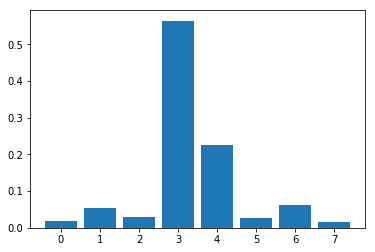

In [161]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)

In [147]:
preduccion= clf.predict(X_test)
preduccion=np.rint(preduccion)
print(pd.DataFrame({"prediccion":preduccion,"original":y_test}).head())

      prediccion  original
1065        11.0        11
1867        11.0        10
2460         9.0         9
249         13.0        16
658         12.0        13


In [148]:
from joblib import dump, load
dump(clf, 'productivo.pkl') 

['productivo.pkl']

In [52]:
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies()
myenv.add_conda_package("scikit-learn")
myenv.add_conda_package('numpy')
myenv.add_conda_package('pandas')
myenv.add_conda_package('joblib')


with open("C:\\Users\\Usuario\\Documents\\ecopetrol\\reto\\reto_myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

In [138]:
X.columns.values

array(['Diameter', 'Height', 'Length', 'Shell weight', 'Shucked weight',
       'Viscera weight', 'Whole weight'], dtype=object)